Projeto de Análise Exploratória de Dados em Linguagem Python para Área de Varejo        
Fazendo os imports

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Carregando o dataset

In [ ]:
df = pd.read_csv('/content/dataset.csv')

Verificando a quantidade de linhas e colunas

In [ ]:
df.shape

(9700, 11)

Visualizando as 5 primeiras linhas do dataset

In [ ]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


#Análise Exploratória
Verificando colunas do conjunto de dados

In [ ]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

Verificando o tipo de dado de cada coluna

In [ ]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

Resumo estatístico da coluna com o valor de vendas

In [ ]:
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

Verificando se há itens duplicados

In [ ]:
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


Verificando se há valores ausentes e solicitando a soma caso houver

In [ ]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [ ]:
df.head()


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


#Perguntas de negócios 1:
Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

In [ ]:
# Filtrar o dataframe pela categoria desejada
df_p1 = df[df['Categoria'] == 'Office Supplies']

In [ ]:
# Agrupar por cidade e somamos o total do valor de venda
df_p1_total = df_p1.groupby('Cidade')['Valor_Venda'].sum()

In [ ]:
# Encontrar a cidade com o maior valor de venda
cidade_maior_venda = df_p1_total.idxmax()
print("Cidade com maior valor de vendas para 'Office Supplies': ", cidade_maior_venda)

Cidade com maior valor de vendas para 'Office Supplies':  New York City


In [ ]:
# Conferindo o resultado
df_p1_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

#Perguntas de negócios 2:
Qual o total de vendas por data do pedido?

In [ ]:
# Calcular o total de vendas para cada data de pedido
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [ ]:
df_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

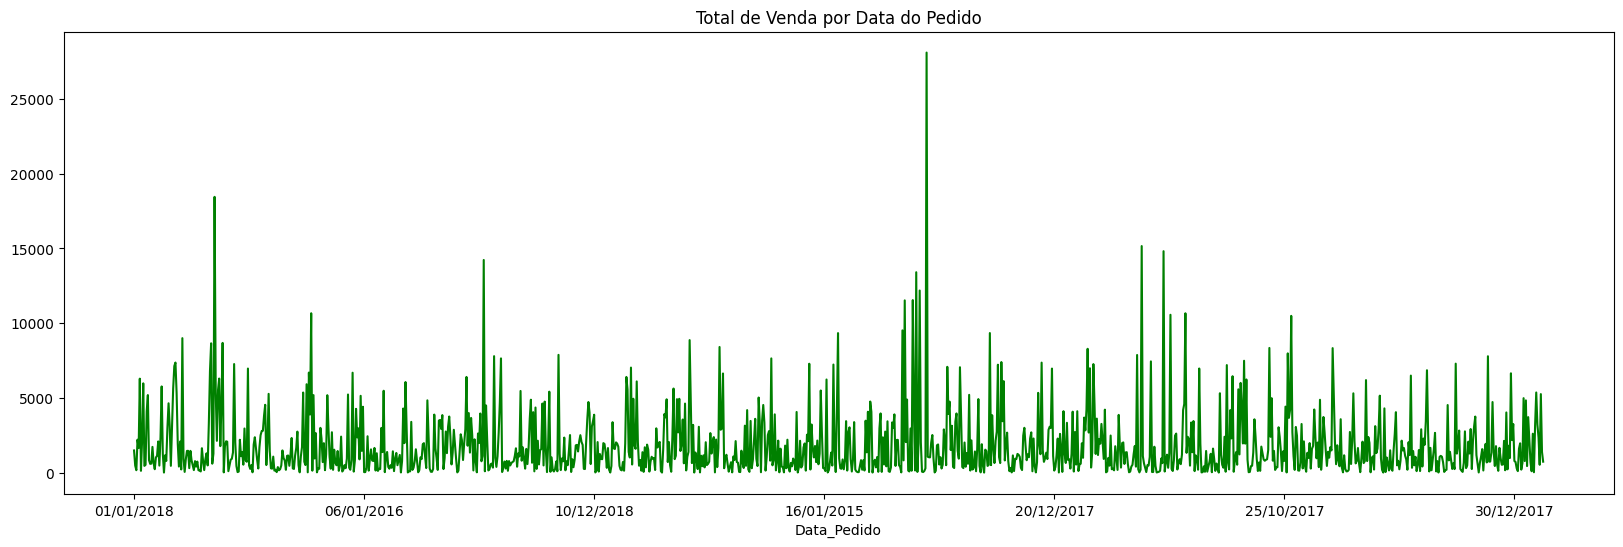

In [ ]:
# Plot
# Criando figura tamanho 20 x 6
plt.figure(figsize = (20, 6))
df_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Venda por Data do Pedido')
plt.show()


#Perguntas de negócios 3:
Qual o tamanho de vendas por Estado?

In [ ]:
# Agrupar por Estado e calcular o total de vendas
df_p3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

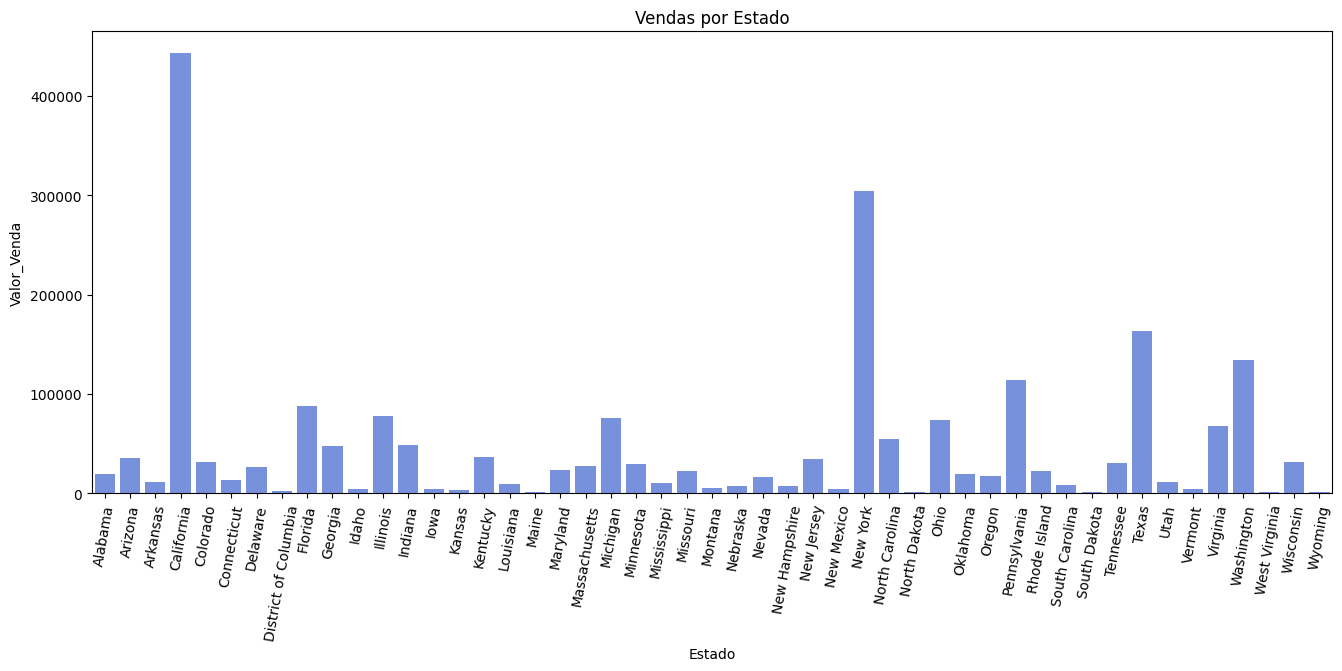

In [ ]:
#Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_p3,
            y = 'Valor_Venda',
            x = 'Estado').set(title = 'Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

#Perguntas de negócios 4:
Quais são as 10 cidades com maior total de vendas?

In [ ]:
#Agrupar por cidade, calcular o total de vendas e ordenar listando somente os 10 primeiros registros
df_p4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

In [ ]:
df_p4.head()

,Cidade,Valor_Venda
327,New York City,251749.219
265,Los Angeles,171654.633
450,Seattle,114725.478
436,San Francisco,107489.952
372,Philadelphia,107197.803


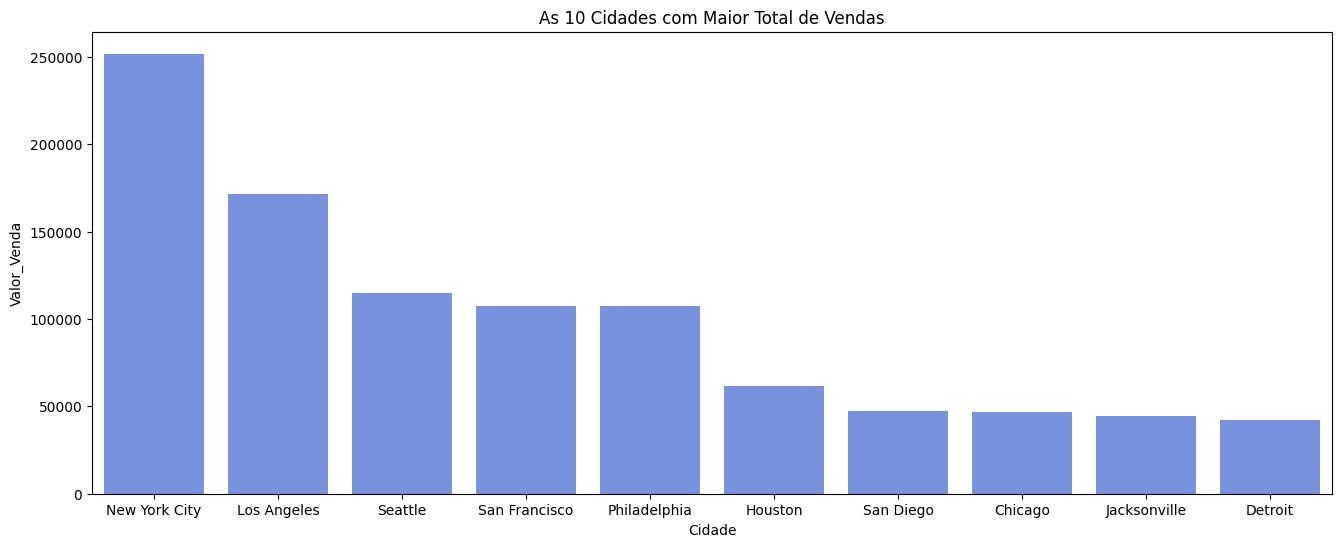

In [ ]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_p4,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()